## Discussion Questions

In [30]:
import math
import random
from ipycanvas import RoughCanvas, hold_canvas
from pythonds3.trees.binary_tree import BinaryTree
from pythonds3.trees.binary_search_tree import BinarySearchTree, BinaryTreeNode
from pythonds3.trees.binary_heap import BinaryHeap
from pythonds3.basic import Stack
from binarytree import Node, NodeTypeError, _ATTR_LEFT, _ATTR_RIGHT, build, heap
import operator
from tqdm import tqdm
from typing import Optional, Any, Union
from pythonds3.sorting import merge_sort, shell_sort, select_sort, bubble_sort, quick_sort
import numpy as np
from timeit import Timer
import matplotlib.pyplot as plt
import sympy as sym

#enable pretty printing for sympy
sym.init_printing()

def generate_n_colours(n):
    return ["#"+''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(n)]


In [2]:

#Child class that accepts strings as root value - just removed __setattr__ int/float check
class StringNode(Node):
    def __init__(self, 
                value, 
                left: Optional['StringNode'] = None,
                right: Optional['StringNode'] = None) -> None:
        self.value = self.val = value 
        self.left = left 
        self.right = right 

    def __setattr__(self, attr: str, obj: Any):
        if attr == _ATTR_LEFT:
            if obj is not None and not isinstance(obj, StringNode):
                raise NodeTypeError("left child must be a StringNode instance")
        
        elif attr == _ATTR_RIGHT:
            if obj is not None and not isinstance(obj, StringNode):
                raise NodeTypeError("right child must be a StringNode instance")

        object.__setattr__(self, attr, obj)


In [4]:
"""
1. Draw the tree structure resulting from the following set of tree function calls
"""

def rotate(p1, p2, angle=45):
    #from Chapter_5 koch_snowflake.py
    #rotate p2 about p1 - first subtract p1 from p3 
    assert angle > 0
    angle = angle
    a = math.radians(angle)
    ox, oy = p1 
    px, py = p2
    #set p1 as origin
    px_o, py_o = px-ox, py-oy 
    #rotate point 
    qx = (math.cos(a) * px_o) - (math.sin(a) * py_o)
    qy = (math.sin(a) * px_o) + (math.cos(a) * py_o)
    return [qx + ox, qy + oy] 

def BT_traversal(tree, root_coords, canvas, line_length=50):
    if tree:
        canvas.fill_text(str(tree.get_root_val()), root_coords[0], root_coords[1])
        ref_p2 = [root_coords[0], root_coords[1] + line_length]
        line_gap = line_length//3.5
        if tree.left_child:
            left_p2 = rotate(root_coords, ref_p2, angle=45)
            canvas.stroke_line(root_coords[0]-line_gap, root_coords[1]+line_gap, left_p2[0]+line_gap, left_p2[1]-line_gap)
            BT_traversal(tree.left_child, left_p2 , canvas)
        if tree.right_child:
            right_p2 = rotate(root_coords, ref_p2, angle=315)
            canvas.stroke_line(root_coords[0]+line_gap, root_coords[1]+line_gap, right_p2[0]-line_gap, right_p2[1]-line_gap)
            BT_traversal(tree.right_child, right_p2, canvas)

def draw_binary_tree(tree, start_coords=None):
    #do an inorder traversal, and draw the tree on a canvas 
    #doesn't work super well when trees are highly populated, but just an initial drawing function
    width = 300 
    height = 200
    canvas = RoughCanvas(width=width, height=height)
    canvas.layout.width = '30%'
    canvas.layout.height = '30%'
    canvas.font = '15px serif'
    if start_coords is None:
        start_coords = [width//2, 20]
    with hold_canvas(canvas):
        BT_traversal(tree, start_coords, canvas)
    
    return canvas

r = BinaryTree(3)
r.insert_left(4)
r.insert_left(5)
r.insert_right(6)
r.insert_right(7)
r.set_root_val(9)
r.insert_left(11)

c = draw_binary_tree(r)
c


RoughCanvas(height=200, layout=Layout(height='30%', width='30%'), width=300)

In [27]:
"""
2. Trace the algorithm for creating an expression tree for the expression (4*8)/6-3.
"""

exp1 = '(((4*8)/6)-3)'
exp2 = '((7+3)*(5-2))'
exp3 = '(3+(4*5))'

def build_expression_tree(exp):
    #assumes single digit numbers inserted for simplification, and expression fully parenthesized
    tokens = [char for char in exp]
    r = BinaryTree(None)
    current_node = r
    node_stack = Stack()
    node_stack.push(r)
    ops_list = ['+', '-', '*', '/']
    for token in tokens:
        if token == '(':
            #create a new node and append as left child, and set current node to new node 
            new_node = BinaryTree(None)
            current_node.set_left_child(new_node)
            node_stack.push(current_node)
            current_node = new_node 

        elif token == ')':
            current_node = node_stack.pop()

        elif token in ops_list:
            #set root_val, and create and move to right child 
            current_node.set_root_val(token)
            current_node.insert_right(None)
            node_stack.push(current_node)
            current_node = current_node.right_child
            
        else:
            #set root val and return to parent
            current_node.set_root_val(token)
            current_node = node_stack.pop()
            
    return r

def eval_expression_tree(exp_tree):
    #base case of leaf node 
    if not exp_tree.get_left_child() and not exp_tree.get_right_child():
        return exp_tree.get_root_val()
    
    ops = {
        '+': operator.add,
        '-': operator.sub,
        '*': operator.mul,
        '/': operator.truediv
    }

    #if not leaf, recurvisly call eval on right and left child
    if exp_tree.get_left_child():
        operand_1 = eval_expression_tree(exp_tree.get_left_child())
    if exp_tree.get_right_child():
        operand_2 = eval_expression_tree(exp_tree.get_right_child())
    operation = ops[exp_tree.get_root_val()]
    #return result of subtree
    return operation(int(operand_1), int(operand_2))
    
def print_exp(tree):
    #modify
    result = ""
    if tree:
        result = "(" + print_exp(tree.get_left_child())
        result = result + str(tree.get_root_val())
        result = result + print_exp(tree.get_right_child()) + ')'
    return result

exp_tree = build_expression_tree(exp3)
c = draw_binary_tree(exp_tree)
print(eval_expression_tree(exp_tree))
print(print_exp(exp_tree))
c

23
((3)+((4)*(5)))


RoughCanvas(height=200, layout=Layout(height='30%', width='30%'), width=300)

In [56]:
"""
3. Consider the following list of integers: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. 
Show the binary search tree resulting from inserting the integers in the list.
"""

def BST_traversal(tree, root=None):
    if tree:
        if root is None:
            root = Node(tree.value)

        if tree.left_child:
            root.left = Node(tree.left_child.value)
            BST_traversal(tree.left_child, root=root.left)
        if tree.right_child:
            root.right = Node(tree.right_child.value)
            BST_traversal(tree.right_child, root=root.right)
        return root

def draw_BST(tree):
    #do an inorder traversal, and draw the tree on a canvas 
    root = BST_traversal(tree._root)
    
    return root

tree = BinarySearchTree()
for key in range(1, 11):
    tree.put(key, key)

t = draw_BST(tree)
print(t)


1
 \
  2
   \
    3
     \
      4
       \
        5
         \
          6
           \
            7
             \
              8
               \
                9
                 \
                  10



In [29]:
"""
4. Consider the following list of integers: 
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]. 
Show the binary search tree resulting from inserting the integers in the list.
"""

tree = BinarySearchTree()
for key in range(10, 0, -1):
    tree.put(key, key)

t = draw_BST(tree)
print(t)



                  10
                 /
                9
               /
              8
             /
            7
           /
          6
         /
        5
       /
      4
     /
    3
   /
  2
 /
1



In [30]:
"""
5. Generate a random list of integers. 
Show the binary heap tree resulting from inserting the integers on the list one at a time.
"""

def add_children(heap, i, root=None):
    n_nodes = len(heap._heap)
    left = (2*i)+1
    right = (2*i)+2
    if root is not None:
        if left < n_nodes:
            left_child = Node(heap._heap[left])
            root.left = left_child 
            add_children(heap, left, root.left)
        if right < n_nodes:
            right_child = Node(heap._heap[right])
            root.right = right_child 
            add_children(heap, right, root.right)

def draw_heap(heap):
    #2p+1 = parent's left child 
    #2p+2 = parent's right child 
    #(n-1)//2 = node's parent 
    n_nodes = len(heap._heap)
    if n_nodes:
        root = Node(heap._heap[0])
        add_children(heap, 0, root)
        return root
    else:
        raise Exception('Heap is empty')

heap = BinaryHeap()
random_ints = random.sample(list(range(30)), k=15)
for key in random_ints:
    heap.insert(key)

h = draw_heap(heap)
print(random_ints)
print(h)



[10, 29, 23, 3, 12, 11, 7, 16, 24, 27, 22, 5, 21, 6, 14]

           __________3________
          /                   \
     ____10___              ___5___
    /         \            /       \
  _16         _12        _7        _6
 /   \       /   \      /  \      /  \
29    24    27    22   23   21   11   14



In [31]:
"""
6. Using the list from the previous question, 
show the binary heap tree resulting from using the list as a parameter to the heapify method. 
Show both the tree and list form.
"""

heap = BinaryHeap()
heap.heapify(random_ints)
h = draw_heap(heap)
print(random_ints)
print(h)




[10, 29, 23, 3, 12, 11, 7, 16, 24, 27, 22, 5, 21, 6, 14]

           __________3_________
          /                    \
     ____10___              ____5__
    /         \            /       \
  _16         _12        _11        6
 /   \       /   \      /   \      / \
29    24    27    22   23    21   7   14



In [32]:
"""
7. Draw the binary search tree that results from inserting the following keys 
in the order given: 68, 88, 61, 89, 94, 50, 4, 76, 66, and 82.
"""

tree = BinarySearchTree()
for key in [68, 88, 61, 89, 94, 50, 4, 76, 66, 82]:
    tree.put(key, key)

t = draw_BST(tree)
print(t)


       ____68______
      /            \
    _61         ____88
   /   \       /      \
  50    66    76       89
 /              \        \
4                82       94



In [33]:
"""
8. Generate a random list of integers. Draw the binary search tree resulting from inserting the integers on the list.
"""

random_ints = random.sample(list(range(100)), k=10)
for key in random_ints:
    tree.put(key, key)

t = draw_BST(tree)
print(random_ints)
print(t)

[59, 93, 20, 81, 8, 46, 79, 5, 89, 34]

                       ____68____________
                      /                  \
                 ____61         __________88
                /      \       /            \
  _____________50       66    76______       89______
 /               \                    \              \
4____             59                  _82            _94
     \                               /              /
      20___                        _81            _93
     /     \                      /              /
    8      _46                   79             89
   /      /
  5      34



In [34]:
"""
9. Consider the following list of integers: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. Show the binary heap resulting from inserting the integers one at a time.
"""

heap = BinaryHeap()
ints = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for key in ints:
    heap.insert(key)

h = draw_heap(heap)
print(h)


        _____1__
       /        \
    __2___       3
   /      \     / \
  4       _5   6   7
 / \     /
8   9   10



In [35]:
"""
10. Consider the following list of integers: 
[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]. Show the binary heap resulting from inserting the integers one at a time.
"""

heap = BinaryHeap()
ints = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
for key in ints:
    heap.insert(key)

h = draw_heap(heap)
print(h)


         ____1__
        /       \
     __2__       5
    /     \     / \
  _4       3   9   6
 /  \     /
10   7   8




##### 11. Consider the two different techniques we used for implementing traversals of a binary tree. Why must we check before the call to preorder when implementing as a method, whereas we could check inside the call when implementing as a function?

```
def preorder(tree):
    if tree:
        print(tree.get_root_val())
        preorder(tree.get_left_child())
        preorder(tree.get_right_child())
```

```
def preorder(self):
    print(self.key)
    if self.left_child:
        self.left_child.preorder()
    if self.right_child:
        self.right_child.preorder()
```

The difference in the two techniques lie in the fact that, in a function, the recursive function call is terminated automatically when the `if tree: ` conditional fails. The big difference here is that in leaf nodes `None` type objects are passed into the function, leading to the base case being reached. However, in the method technique, because the method is attached to each instance, and we have to invoke the method for each child recursively (can't call self.preorder() for a node's child...). Before that we have to check that the child is not `None`, or else an error is raised because a `None` type object will not be callable. It really is just different placement of the conditional (`if tree: ` vs `if self.left_child:`), and where the `None` is handled (in the function case, `None` is passed into function call which is handled by the conditional, where as in the method call it's tested by the left and right child checks)




In [36]:
"""
12. Show the function calls needed to build the following binary tree.
"""

t = StringNode('Language')
t.left = StringNode('Compiled')
t.left.left = StringNode('C')
t.left.right = StringNode('Java')
t.right = StringNode('Interpreted')
t.right.left = StringNode('Python')
t.right.right = StringNode('Scheme')

print(t)



       _________Language____________
      /                             \
  Compiled_                  ___Interpreted__
 /         \                /                \
C          Java          Python             Scheme



In [37]:
"""
13. Given the following tree, perform the appropriate rotations to bring it back into balance.
"""

#values are each node's balance factors
old = Node(-2)
old.left = Node(0)
old.right = Node(1)
old.right.left = Node(1)
old.right.left.left = Node(0)
old.right.right = Node(0)
print(old)
print(old.is_balanced)

#perform right rotation on root's right child b/c it is left heavy, then left rotation on root (b/c right heavy)
new = Node(0)
new.left = Node(0)
new.left.left = Node(0)
new.left.right = Node(0)
new.right = Node(-1)
new.right.left = Node(0)
print(new)
print(new.is_balanced)



  -2____
 /      \
0        1
        / \
       1   0
      /
     0

False

    __0__
   /     \
  0       -1
 / \     /
0   0   0

True


In [38]:
"""
14. Using the following as a starting point, derive the equation that gives the updated balance factor for node D.
"""

start = StringNode('B')
start.left = StringNode('A')
start.right = StringNode('D')
start.right.left = StringNode('C')
start.right.right = StringNode('E')
print(start)

end = StringNode('D')
end.left = StringNode('B')
end.left.left = StringNode('A')
end.left.right = StringNode('C')
end.right = StringNode('E')

print(end)


  B__
 /   \
A     D
     / \
    C   E


    __D
   /   \
  B     E
 / \
A   C



$ oldBalance(D) = h_{C} - h_{E} $


$ newBalance(D) = h_{B} - h_{E} $


$ h_{B} = 1 + max(h_{A}, h_{C}) $

$ newBalance(D) = 1 + max(h_{A}, h_{C}) - h_{E}$

$ newBalance(D) - oldBalance(D) = 1 + max(h_{A}, h_{C}) - h_{E} - (h_{C} - h_{E}) $

$ newBalance(D) - oldBalance(D) = 1 + max(h_{A} - h_{C} , 0) $

$ newBalance(B) = h_{A} - h_{C} $

$ newBalance(D) = oldBalance(D) + 1 + max(newBalance(B), 0) $


## Programming Exercises

In [39]:
"""
1. Extend the build_parse_tree function to handle mathematical expressions that do not have spaces between every character.
"""

exp1 = '(((42*8)/6)-3)'
exp2 = '((71+3)*(54-2))'
exp3 = '(30+(42*5))'

#actually already did this in discussion questions, but will extend it to allow multi-digit numbers
def tokenize(exp):
    tokens = []
    current = ""
    for char in exp:
        if char in '()+-*/^':
            #append current 
            if len(current):
                tokens.append(current)
            tokens.append(char)
            current = ""
        else:
            if char.isnumeric():
                current += char 
    return tokens


def build_expression_tree(exp):
    #assumes single digit numbers inserted for simplification, and expression fully parenthesized
    tokens = tokenize(exp)
    r = BinaryTree(None)
    current_node = r
    node_stack = Stack()
    node_stack.push(r)
    ops_list = ['+', '-', '*', '/']
    for token in tokens:
        if token == '(':
            #create a new node and append as left child, and set current node to new node 
            new_node = BinaryTree(None)
            current_node.set_left_child(new_node)
            node_stack.push(current_node)
            current_node = new_node 

        elif token == ')':
            current_node = node_stack.pop()

        elif token in ops_list:
            #set root_val, and create and move to right child 
            current_node.set_root_val(token)
            current_node.insert_right(None)
            node_stack.push(current_node)
            current_node = current_node.right_child
            
        else:
            #set root val and return to parent
            current_node.set_root_val(token)
            current_node = node_stack.pop()
            
    return r

exp_tree = build_expression_tree(exp3)
c = draw_binary_tree(exp_tree)
print(eval_expression_tree(exp_tree))
print(print_exp(exp_tree))
c



240
((30)+((42)*(5)))


RoughCanvas(height=200, layout=Layout(height='30%', width='30%'), width=300)

In [40]:
"""
2. Modify the build_parse_tree and evaluate functions to handle boolean statements (and, or, and not). 
Remember that “not” is a unary operator, so this will complicate your code somewhat.
"""

def boolean_tokenize(exp, ops_list=None):
    tokens = []
    parentheses = '()'
    current = []
    for char in exp:
        if char in parentheses:
            if len(current):
                tokens.append(''.join(current).strip())
            tokens.append(char)
            current = []
        else:
            current.append(char)
            if any([op in ''.join(current) for op in ops_list]):
                curr_str = ''.join(current)
                op = ''
                for _ in range(3):
                    op += curr_str[-1]
                    curr_str = curr_str[:-1]

                curr_str = curr_str.strip()
                if len(curr_str):
                    tokens.append(curr_str.strip())
                tokens.append(op[::-1].strip())
                current = []

    if len(current):
        tokens.append(''.join(current).strip())
    return [t for t in tokens if len(t) > 0]


def build_boolean_tree(exp):
    """
    boolean expression assumes python syntax
    expression needs to be fully parenthesized, but not operators do NOT need to be parenthesized 
    e.g. (b > 2 and not a == 1) is fine, but (b > 2 and (not a == 1)) will cause an error 
    """
    ops_list = ['and', 'or', 'not']
    tokens = boolean_tokenize(exp, ops_list=ops_list)
    r = BinaryTree(None)
    current_node = r
    node_stack = Stack()
    node_stack.push(r)
    for token in tokens:
        if token == '(':
            #create a new node and append as left child, and set current node to new node 
            new_node = BinaryTree(None)
            current_node.set_left_child(new_node)
            node_stack.push(current_node)
            current_node = new_node 

        elif token == ')':
            current_node = node_stack.pop()

        elif token in ops_list:
            if token != 'not':
                current_node.set_root_val(token)
                #set root_val, and create and move to right child 
                current_node.insert_right(None)
                node_stack.push(current_node)
                current_node = current_node.right_child
            else:
                current_node.set_root_val(token)
                #key difference here is don't push new parent into node stack, b/c 
                #not is unary, after the child sets node val it should return to the not's parent op node
                current_node.insert_left(None)
                current_node = current_node.left_child
        else:
            #set root val and return to parent
            current_node.set_root_val(token)
            current_node = node_stack.pop()
                
    return r



In [99]:
def boolean_tree_traversal(tree, root=None):
    if tree:
        if root is None:
            root = StringNode(tree.root)

        if tree.left_child:
            root.left = StringNode(tree.left_child.root)
            boolean_tree_traversal(tree.left_child, root=root.left)
        if tree.right_child:
            root.right = StringNode(tree.right_child.root)
            boolean_tree_traversal(tree.right_child, root=root.right)
        return root

def draw_boolean_tree(tree):
    #do an inorder traversal, and draw the tree on a canvas 
    root = boolean_tree_traversal(tree)
    return root

def eval_boolean_tree(exp_tree, **kwargs):
    """
    function expects the boolean tree, and dict that contains the variables
    e.g. {a: 1, b: 2 c: 3}
    """

    ops_list = ['and', 'or', 'not']
    
    #base case of leaf node - need to differentiate between "not" leaf node (unary) and other leaf nodes "binary"
    if not exp_tree.get_left_child() and not exp_tree.get_right_child():
        # normal leaf node
        return eval(exp_tree.get_root_val(), kwargs)
    elif exp_tree.get_left_child() and not exp_tree.get_right_child() and exp_tree.get_root_val() == 'not':
        # "not" node
        if exp_tree.get_left_child().get_root_val() not in ops_list:
            #this deals with cases where 'not' is followed by a straightforward logical comparison
            return eval('not ' + exp_tree.get_left_child().get_root_val(), kwargs)

    #if not leaf, recurvisly call eval on right and left child
    operand_1 = None 
    operand_2 = None 

    if exp_tree.get_left_child():
        operand_1 = eval_boolean_tree(exp_tree.get_left_child(), **kwargs)
    if exp_tree.get_right_child():
        operand_2 = eval_boolean_tree(exp_tree.get_right_child(), **kwargs)

    if operand_1 is not None and operand_2 is not None:
        operation = exp_tree.get_root_val()
        #return result of subtree
        return eval(' '.join(map(str, [operand_1, operation, operand_2])))
    else:
        #this deals with cases where 'not' is followed by further compound
        return eval('not ' + str(operand_1))
    

In [100]:
exp1 = 'not not not ((a != 2 and not (a == 3 or d == 1)) or (c == d and d == 5))'
t = build_boolean_tree(exp1)
root = draw_boolean_tree(t)
print(eval_boolean_tree(t, a=3, b=4, c=4, d=5))
print(root)

True

                                                            _not
                                                           /
                                                        _not
                                                       /
                                  ___________________not
                                 /
          ______________________or________
         /                                \
    ___and__________________           ___and__
   /                        \         /        \
a != 2              ________not    c == d     d == 5
                   /
               ___or__
              /       \
           a == 3    d == 1



In [43]:
"""
3. Using the find_successor method, write a non-recursive inorder traversal for a binary search tree.

- Successor is the next largest key in the tree 
- Successor (aka. INORDER successor) is the next node you will traverse in inorder traveral! which also
happens to be a node's successor
- https://www.geeksforgeeks.org/inorder-successor-in-binary-search-tree/

Excerpt from runestone: 
This code makes use of the same properties of binary search trees that cause an ***** inorder traversal to
print out the nodes in the tree from smallest to largest ******* (missed this part during reading =.=). 
There are three cases to consider when 
looking for the successor:
1. If the node has a right child, then the successor is the smallest key in the right subtree.

2. If the node has no right child and is the left child of its parent, then the parent is the successor.

3. If the node is the right child of its parent, and itself has no right child, then the successor to this 
node is the successor of its parent, excluding this node.
"""

class Q3BinarySearchTree(BinarySearchTree):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def inorder(self, method=2):
        assert 0 < method < 3
        if method == 1:
            return self._inorder_with_stack()
        elif method == 2:
            return self._inorder_with_find_successor()

    def _inorder_with_stack(self):
        #geeks for geeks
        res = []
        node_stack = Stack()
        current = self.get_root()

        while not node_stack.is_empty() or current is not None:
            if current is not None:
                #traverse down to end of left subtree 
                node_stack.push(current)
                current = current.left_child
            else:
                #go back up to last valid node 
                current = node_stack.pop()
                res.append(current.get_key())
                #go to right child and traverse down left subtree next iter 
                current = current.right_child
        return res

    def _inorder_with_find_successor(self):
        #really find_successor is the recursive part here, but this function itself is iterative
        res = []
        current = self.get_root().find_min()
        while current is not None:
            res.append(current.get_key())
            current = current.find_successor()
        return res 
                
Q3Tree = Q3BinarySearchTree()
vals = random.sample(list(range(0, 100)), 30)
for val in vals:
    Q3Tree.put(val, val)

print(Q3Tree.inorder())

q3t = draw_BST(Q3Tree)
print(q3t)

assert [n.val for n in q3t.inorder] == Q3Tree.inorder()


[3, 4, 5, 6, 8, 9, 10, 15, 17, 21, 31, 40, 46, 47, 50, 57, 58, 62, 64, 73, 75, 79, 80, 85, 87, 89, 92, 93, 94, 98]

    ____8___________
   /                \
  4           _______21_______________
 / \         /                        \
3   5       10               __________57_____________________
     \     /  \             /                                 \
      6   9    15         _40______                           _85____________
                 \       /         \                         /               \
                  17    31      ____50               _______80               _94
                               /                    /                       /   \
                              46                  _73               _______93    98
                                \                /   \             /
                                 47            _64    75          87
                                              /         \           \
                       

In [101]:
"""
4. Modify the code for a binary search tree to make it threaded. Write a non-recursive inorder traversal method for 
the threaded binary search tree. A threaded binary tree maintains a reference from each node to its successor.

this helped with implementation 
https://shunsvineyard.info/2021/04/09/build-the-forest-in-python-series-double-threaded-binary-search-tree/#0-project-setup

Ended up doing a double threaded tree, without realising how much more complicated it'd make conceptualising and implementation
(just a lot more thread updates to take care of)
"""

class ThreadedBinaryTree(BinarySearchTree):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def put(self, key: Any, value: Any) -> None:
        if self._root:
            self._put(key, value, self._root)
        else:
            self._root = ThreadedTreeNode(key, value)
        self._size += 1

    def _put(self, key: Any, value: Any, current_node: "ThreadedTreeNode") -> None:
        if key < current_node.key:
            if current_node.leftThread == False:
                self._put(key, value, current_node.left_child)
            else:
                new = ThreadedTreeNode(
                    key, value, parent=current_node, 
                )
                new.left_child = current_node.left_child #inheriting leftThread from parent 
                new.right_child = current_node #rightThread is the parent itself (inorder successor of left child)
                current_node.left_child = new
                current_node.leftThread = False 
        else:
            if current_node.rightThread == False:
                self._put(key, value, current_node.right_child)
            else:
                new = ThreadedTreeNode(
                    key, value, parent=current_node,
                )
                new.left_child = current_node #inorder successor is parent 
                new.right_child = current_node.right_child #inherit right thread from parent
                current_node.right_child = new
                current_node.rightThread = False

    def _delete(self, current_node: "ThreadedTreeNode") -> None:
        """
        changed implementation a little bit - 
        if root has a child, we simply promote the child to the root, and fixed the threads accordingly,
        (which is the same thread updates as if root was a left or right child - ) <- Tripped me up a lot 
        instead of substituting root values with child's values.
        """
        #break1 = 'here'
        if current_node.is_leaf():
            if current_node.is_left_child():
                current_node.parent.leftThread = True
                current_node.parent.left_child = current_node.left_child 
            else:
                current_node.parent.rightThread = True
                current_node.parent.right_child = current_node.right_child
            #update threads 
        elif current_node.has_children():
            #break2 = 'here'
            #case 1: right child of deleting node is the leftmode node in the right subtree
            # - here the right child replaces the deleting node directly (b/c is successor)
            successor = current_node.find_successor()
            predecessor = current_node.find_predecessor()
            successor.splice_out(self)
            current_node.key = successor.key 
            current_node.value = successor.value 

        else:
            #break3 = 'here'
            #current_node has a child 
            successor = current_node.find_successor()
            predecessor = current_node.find_predecessor()
            is_left = is_right = False

            if current_node.leftThread == False:
                #has left child 
                if current_node.is_left_child():
                    current_node.left_child.parent = current_node.parent 
                    current_node.parent.left_child = current_node.left_child
                    is_left = True
                elif current_node.is_right_child():
                    current_node.left_child.parent = current_node.parent 
                    current_node.parent.right_child = current_node.left_child
                    is_right = True 
                else:
                    self.root = current_node.left_child
                    self.root.parent = None
                    
            else:
                #has right_child 
                if current_node.is_left_child():
                    current_node.right_child.parent = current_node.parent 
                    current_node.parent.left_child = current_node.right_child
                    is_left = True  
                elif current_node.is_right_child():
                    current_node.right_child.parent = current_node.parent 
                    current_node.parent.right_child = current_node.right_child
                    is_right = True 
                else:
                    self.root = current_node.right_child 
                    self.root.parent = None
            
            #update threads 
            if is_right:
                if successor and successor.leftThread:
                    successor.left_child = predecessor 
            elif is_left:
                if predecessor and predecessor.rightThread:
                    predecessor.right_child = successor

    def _delete_2(self, current_node: "ThreadedTreeNode") -> None:
        #original idea i was shooting for (b/c splice out is just leaf/has single child deletion)
        #embedded in node class 
        if current_node.has_children():
            break2 = 'here'
            #case 1: right child of deleting node is the leftmode node in the right subtree
            # - here the right child replaces the deleting node directly (b/c is successor)
            successor = current_node.find_successor()
            predecessor = current_node.find_predecessor()
            successor.splice_out(self)
            current_node.key = successor.key 
            current_node.value = successor.value 
        else:
            current_node.splice_out(self)

    def _get(
        self, key: Any, current_node: "ThreadedTreeNode"
    ) -> Union["ThreadedTreeNode", None]:
        if not current_node:
            #no more nodes to go through
            return None

        if current_node.key == key:
            return current_node 
        elif key < current_node.key:
            if current_node.leftThread == False:
                return self._get(key, current_node.left_child)
            else:
                return None
        else:
            if current_node.rightThread == False:
                return self._get(key, current_node.right_child)
            else:
                return None

    def inorder(self) -> None:
        return self._inorder()

    def _inorder(self) -> None:
        res = []
        current = self.get_root().find_min()
        while len(res) < self.size():
            res.append(current.key)
            if current.rightThread:
                current = current.right_child 
            else:
                current = current.right_child.find_min()
        return res

    def reverse_inorder(self) -> None:
        return self._reverse_inorder()

    def _reverse_inorder(self) -> None:
        res = []
        current = self.get_root().find_max()
        while len(res) < self.size():
            res.append(current.key)
            if current.leftThread:
                current = current.left_child
            else:
                current = current.left_child.find_max()
        return res

class ThreadedTreeNode(BinaryTreeNode):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        """
        leftThread and rightThread indicates if left 
        and right pointers are children or successors/predecessors

        - pretty much any function that depended on left and right child has to be rewritten
        """
        self.leftThread = True 
        self.rightThread = True 

    def __setattr__(self, name, val):
        #add checks here to assert that leftThread and rightThread are boolean 
        if name == 'leftThread' or name == 'rightThread':
            if type(val) != bool:
                raise Exception(f'{name} must be a boolean!')
        object.__setattr__(self, name, val)

    def is_leaf(self) -> bool:
        return self.leftThread and self.rightThread

    def has_a_child(self) -> bool:
        return not self.leftThread or not self.rightThread 

    def has_children(self) -> bool:
        return not self.leftThread and not self.rightThread 

    def find_min(self):
        current = self 
        while current.leftThread == False:
            current = current.left_child 
        return current 

    def find_max(self):
        current = self
        while current.rightThread == False:
            current = current.right_child 
        return current 

    def find_predecessor(self):
        if self.leftThread:
            #leaf node 
            return self.left_child 
        else:
            #non-leaf 
            predecessor = None 
            #non-leaf has left_child 
            if self.left_child:
                return self.left_child.find_max()
            else:
                if self.parent:
                    if self.is_right_child():
                        predecessor = self.parent 
                    else:
                        self._parent.left_child = None 
                        predecessor = self.parent.find_predecessor()
                        self._parent.right_child = self 
            return predecessor


    def find_successor(self):
        if self.rightThread:
            #leaf node 
            return self.right_child 
        else:
            successor = None
            if self.right_child:
                successor = self.right_child.find_min()
            else:
                if self.parent:
                    if self.is_left_child():
                        successor = self.parent
                    else:
                        self.parent.right_child = None 
                        successor = self.parent.find_successor()
                        self.parent.right_child = self 
        return successor 

    def splice_out(self, tree):
        #this is just to make _delete tidier honestly
        if self.is_leaf():
            if self.is_left_child():
                self.parent.leftThread = True
                self.parent.left_child = self.left_child
            else:
                self.parent.rightThread = True
                self.parent.right_child = self.right_child
        elif self.has_a_child():
            successor = self.find_successor()
            predecessor = self.find_predecessor()
            is_left = is_right = False

            if self.leftThread == False:
                if self.is_left_child():
                    self.left_child.parent = self.parent 
                    self.parent.left_child = self.left_child
                    is_left = True
                elif self.is_right_child():
                    self.left_child.parent = self.parent 
                    self.parent.right_child = self.left_child
                    is_right = True 
                else:
                    #need to deal with this 
                    tree.root = self.left_child
                    tree.root.parent = None
                    is_left = True
            else:
                #has right_child 
                if self.is_left_child():
                    self.right_child.parent = self.parent 
                    self.parent.left_child = self.right_child
                    is_left = True  
                elif self.is_right_child():
                    self.right_child.parent = self.parent 
                    self.parent.right_child = self.right_child
                    is_right = True 
                else:
                    tree.root = self.right_child 
                    tree.root.parent = None
                    is_right = True

            #update threads 
            if is_right:
                if successor and successor.leftThread:
                    successor.left_child = predecessor 
            elif is_left:
                if predecessor and predecessor.rightThread:
                    predecessor.right_child = successor


            
def threaded_traversal(tree, root=None):
    if tree:
        if root is None:
            root = Node(tree.value)

        if tree.left_child and tree.leftThread==False:
            root.left = Node(tree.left_child.value)
            threaded_traversal(tree.left_child, root=root.left)
        if tree.right_child and tree.rightThread==False:
            root.right = Node(tree.right_child.value)
            threaded_traversal(tree.right_child, root=root.right)

        # if tree.leftThread and tree.left_child:
        #     print(f'{tree.key}, leftThread={tree.left_child.key}')
        #     pass
        # if tree.rightThread and tree.right_child:
        #     print(f'{tree.key}, rightThread={tree.right_child.key}')
        #     pass
        return root

def draw_threaded_tree(tree):
    return threaded_traversal(tree.get_root())
    
        


In [102]:
#test inorder traversal threaded and non-threaded 
n_trials = 1000
max_size = 100

for _ in tqdm(range(n_trials)):
    q3tree = Q3BinarySearchTree()
    ttree = ThreadedBinaryTree()

    vals = random.sample(list(range(0, max_size)), max_size)
    for val in vals:
        q3tree.put(val, val)
        ttree.put(val, val)
    assert draw_BST(q3tree).equals(draw_threaded_tree(ttree))
    assert q3tree.inorder() == ttree.inorder()
    assert q3tree.inorder() == list(reversed(ttree.reverse_inorder()))

    #try random deletions and test 

    dels = random.sample(vals, max_size-1)
    for i, val in enumerate(dels):
        ttree.delete(val)
        q3tree.delete(val)
    assert draw_BST(q3tree).equals(draw_threaded_tree(ttree))
    assert q3tree.inorder() == ttree.inorder()
    assert q3tree.inorder() == list(reversed(ttree.reverse_inorder()))

100%|██████████| 1000/1000 [00:13<00:00, 73.16it/s]


In [46]:
"""
5. Modify our implementation of the binary search tree so that it handles duplicate keys properly. 
That is, if a key is already in the tree then the new payload should replace the old rather than add 
another node with the same key.
"""

class Q5BinarySearchTree(BinarySearchTree):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def put(self, key: Any, value: Any) -> None:
        """Add new node - nothing new just to see what the public put method is doing"""
        if self._root:
            self._put(key, value, self._root)
        else:
            self._root = BinaryTreeNode(key, value)
        self._size = self._size + 1

    def _put(self, key: Any, value: Any, current_node: "BinaryTreeNode") -> None:
        """Add new node (helper function)"""
        if key < current_node.key:
            if current_node.left_child:
                self._put(key, value, current_node.left_child)
            else:
                current_node.left_child = BinaryTreeNode(
                    key, value, parent=current_node
                )
        elif key > current_node.key:
            if current_node.right_child:
                self._put(key, value, current_node.right_child)
            else:
                current_node.right_child = BinaryTreeNode(
                    key, value, parent=current_node
                )
        else:
            #key == current_node.key
            current_node.value = value
            """
            b/c put method will always +1 after adding a node, so 
            we just put the counter operation here (saves the trouble of having 
            to pass another variable out to decide if we're adding to self._size)
            """
            self._size -= 1

In [47]:
"""
test new _put method 
"""

q5tree = Q5BinarySearchTree()
#test case - put at node and replace value 
q5tree.put(1, 1)
q5tree.put(1, 'replaced')
assert q5tree.get_root().value == 'replaced'

#test case - replace value at other nodes 
vals = random.sample(list(range(20)), 10)
for v in vals:
    q5tree.put(v, v)

for v in vals:
    q5tree.put(v, 'replaced')
    assert q5tree.get(v) == 'replaced'


In [33]:
"""
6. Create a binary heap with a limited heap size. In other words, the heap only keeps track of the n most important items.
If the heap grows in size to more than n items the least important item is dropped.

referenced python heapq:
https://github.com/python/cpython/blob/3.10/Lib/heapq.py
"""


class LimitedBinaryHeap(BinaryHeap):
    def __init__(self, size_limit=10):
        """smaller number equals higher priority"""
        self._heap: list[Any] = []
        self._size_limit = size_limit

    def insert(self, item: Any) -> None:
        """Add a new item - but if len(self._heap) is greater than 
        size limit after insertion then the root is removed (b/c lowest value hence 
        lowest priority)"""
        self._heap.append(item)
        self._perc_up(len(self._heap) - 1)

        # if size is at limit there are two scenarios:
        # 1. if new item is larger than root, then we set new item as root, and perc_down, 
        # (b/c lowest priority is always root assuming 
        # low value = low priority, so we can just do a simple exchange)
        # 2. if new item is smaller than/equal to root, the new item after
        # restoring heap properties will become new root, so we just don't add it to the 
        # heap
        # (referencing heapq which recommends heappushpop 
        # to implement fixed size heaps - but this assumes we want to remove 
        # root when len(self._heap) is greater than limit, which isn't really 
        # the same as removing the least important item, which would be the 
        # max value in a min heap priority queue)

        # if item > self._heap[0]:
        #     self._heap[0] = item 
        #     self._perc_down(0)

        if len(self._heap) > self._size_limit:
            self.remove_max()


    def find_max_idx(self):
        """finds max value in min heap and returns max idx 
        - we only have to inspect leaf nodes b/c by definition must be the largest 
        nodes within the heap
        - this function is O(n), given we have to inspect every leaf node which is worstcase
        n/2 nodes in a full binary tree. So incorporating this function within insert
        makes insert also O(n) instead of O(log(n)) when size limit has been reached."""
        max_idx = len(self._heap)//2
        max_val = self._heap[max_idx]
        for i in range(max_idx + 1, len(self._heap)):
            if self._heap[i] > max_val:
                max_idx = i 
                max_val = self._heap[i]
        return max_idx

    def remove_max(self):
        max_idx = self.find_max_idx()
        if max_idx == len(self._heap)-1:
            self._heap.pop()
        else:
            #replace max_val with end_val, then perc up to restore heap property
            self._heap[max_idx], self._heap[-1] = self._heap[-1], self._heap[max_idx]
            self._heap.pop()
            self._perc_up(max_idx)

            
    def heapify(self, not_a_heap: list[Any], show_details: bool=False) -> None:
        """build a heap from any list - if list exceeds size limit, raise exception"""
        if len(not_a_heap) <= self._size_limit:
            self._heap = not_a_heap[:]
            cur_idx = len(self._heap) // 2 - 1
            while cur_idx >= 0:
                self._perc_down(cur_idx)
                cur_idx = cur_idx - 1
                if show_details:
                    print(self._heap)
        else:
            raise Exception('length of list is greater than size limit!')


        # below is for allowing not_a_heap to be greater than size lim, and 
        # will trim self._heap by removing max one at a time. But 
        # if k = len(not_a_heap) is much greater than l = size limit, 
        # removal can become very inefficient b/c it'll
        # take (k - l) * k/2, which can be close to k**2/2 when (k-l) becomes
        # large

        # i = 1
        # while len(self._heap) > self._size_limit:
        #     self.remove_max()
        #     if show_details:
        #         print(f'trim {i}: {self._heap}')
        #     i += 1


def heap_check(heap, is_min=True):
    """checks that a heap is valid"""
    root = build(heap._heap)
    if is_min:
        assert root.is_min_heap 
    else:
        assert root.is_max_heap

In [49]:
#test LimitedBinaryHeap
size_limit = 10
heap = LimitedBinaryHeap(size_limit=size_limit)
vals = random.sample(range(100), 2*size_limit)
print('insertion')
for v in vals:
    heap.insert(v)
    print(f'new: {v}, {heap._heap}')
    heap_check(heap)

print('heapify')
heap.heapify(vals[:size_limit], show_details=True)
heap_check(heap)



insertion
new: 16, [16]
new: 81, [16, 81]
new: 93, [16, 81, 93]
new: 96, [16, 81, 93, 96]
new: 79, [16, 79, 93, 96, 81]
new: 49, [16, 79, 49, 96, 81, 93]
new: 18, [16, 79, 18, 96, 81, 93, 49]
new: 42, [16, 42, 18, 79, 81, 93, 49, 96]
new: 14, [14, 16, 18, 42, 81, 93, 49, 96, 79]
new: 24, [14, 16, 18, 42, 24, 93, 49, 96, 79, 81]
new: 47, [14, 16, 18, 42, 24, 93, 49, 47, 79, 81]
new: 85, [14, 16, 18, 42, 24, 85, 49, 47, 79, 81]
new: 94, [14, 16, 18, 42, 24, 85, 49, 47, 79, 81]
new: 57, [14, 16, 18, 42, 24, 57, 49, 47, 79, 81]
new: 7, [7, 14, 18, 42, 16, 57, 49, 47, 79, 24]
new: 17, [7, 14, 18, 17, 16, 57, 49, 47, 42, 24]
new: 87, [7, 14, 18, 17, 16, 57, 49, 47, 42, 24]
new: 78, [7, 14, 18, 17, 16, 57, 49, 47, 42, 24]
new: 76, [7, 14, 18, 17, 16, 57, 49, 47, 42, 24]
new: 95, [7, 14, 18, 17, 16, 57, 49, 47, 42, 24]
heapify
[16, 81, 93, 96, 24, 49, 18, 42, 14, 79]
[16, 81, 93, 14, 24, 49, 18, 42, 96, 79]
[16, 81, 18, 14, 24, 49, 93, 42, 96, 79]
[16, 14, 18, 42, 24, 49, 93, 81, 96, 79]
[14, 

In [50]:
"""
7. Clean up the print_exp function so that it does not include an 'extra' set of parentheses around each number.
"""

def mod_print_exp(tree):
    if tree:
        left = "(" + mod_print_exp(tree.get_left_child())
        root = str(tree.get_root_val())
        right = mod_print_exp(tree.get_right_child()) + ")"

        if left == "(" and right == ")":
            #this means we hit an operand node and left and right child are empty.
            return root
        else:
            return left + root + right

    else:
        return ""


exp1 = '(((44*8)/6)-3)'
exp2 = '((71+3)*(54-2))'
exp3 = '(30+(42*5))'

for exp in [exp1, exp2, exp3]:
    exp_str = mod_print_exp(build_expression_tree(exp))
    print(exp_str)
    assert exp == exp_str


(((44*8)/6)-3)
((71+3)*(54-2))
(30+(42*5))


In [51]:
"""
8. Using the heapify method, write a sorting function that can sort a list in O(nlogn) time.
"""

def heap_sort(lst):
    # O(n) + n*log(n) -> nlog(n)
    res = []
    heap = BinaryHeap()
    heap.heapify(lst) # O(n) operation
    while len(heap._heap) > 1:
        res.append(heap._heap[0])
        heap.delete() # O(log(n)) operation

    res.append(heap._heap[0])
    return res 

n_trials = 100 
size = 100 

for _ in tqdm(range(n_trials)):
    vals = random.sample(range(1000), size)
    assert heap_sort(vals) == sorted(vals)

100%|██████████| 100/100 [00:00<00:00, 850.30it/s]


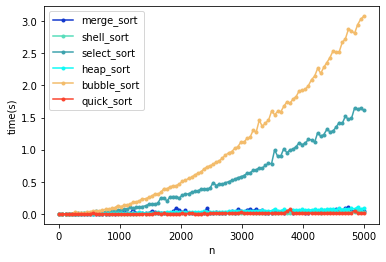

In [61]:
#compare heap sort with other sorts to see time complexity

n_trials = 1
min_size = 10
max_size = 5_000
X = np.linspace(min_size, max_size, num=100)
Ys = []
methods = [merge_sort, shell_sort, select_sort, heap_sort, bubble_sort, quick_sort]
for method in methods:
    method_y = []
    for size in tqdm(X, leave=False):
        size = int(size)
        x = [random.randint(0, size) for _ in range(size)]
        t = Timer(f"{method.__name__}(x)", f"from __main__ import x, {method.__name__}")
        method_y.append(t.timeit(number=n_trials))
    Ys.append(method_y)


colours = generate_n_colours(len(methods))

for method, Y, colour in zip(methods, Ys, colours):
    plt.plot(X, Y, color=colour, marker='.', label=method.__name__)

plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()

In [3]:
def traverse_binary_tree(tree, root=None):
    if tree:
        if root is None:
            root = StringNode(str(tree._key))

        if tree.left_child:
            root.left = StringNode(str(tree.left_child._key))
            traverse_binary_tree(tree.left_child, root=root.left)
        if tree.right_child:
            root.right = StringNode(str(tree.right_child._key))
            traverse_binary_tree(tree.right_child, root=root.right)
        return root

def draw_binary_tree_2(tree):
    #do an inorder traversal, and draw the tree on a canvas 
    root = traverse_binary_tree(tree, root=None)
    return root


        
    

In [3]:
"""
9. Write a function that takes a parse tree for a 
mathematical expression and calculates the derivative of the expression with respect to some variable.

Used sympy here - basically what it does is it uses the parse tree to build up the expression that will finally 
be evaluated in sym.diff. It's a bit of a hack, because we're not coding the actual rules of common derivatives and
evaluating the parse tree step by step.

Essentially the symdiff_from_expression function replaces all functions with sym.function, 
recreates the fully parenthesized expression from the parse tree, and passes it 
to sym.diff

extra:
In the extension below (symdiff_from_infix), implemented to shunting yard algorithm to generate a parse tree
from infix expressions, and then uses the parse tree to generate fully parenthesized expression for differentiation by
sympy.

"""

def tokenize_q9(exp, functions=None, ignore_square_brackets=True):
    #need to deal with negative number/negative variable
    tokens = []
    current = ""
    ops = '()+-/*'
    if not ignore_square_brackets:
        ops += '[]'
    is_negative = False
    for i, char in enumerate(exp):
        if char in ops:
            #append current 
            if len(current):
                if is_negative:
                    #check if current operand should be negative
                    tokens.append('-' + current)
                    is_negative = False
                else:
                    tokens.append(current)

            if char == '*':
                #deal with exponentiation operators - check to see if '*' should wait
                if exp[i+1] == '*':
                    #do nothing
                    pass
                elif exp[i-1] == '*':
                    tokens.append('**')
                else:
                    tokens.append('*')
            elif char == '-':
                #deal with negative numbers/variables - indicate if current operand should be negative
                if i == 0 or tokens[-1] in '[(+-*/' or tokens[-1] in functions:
                    is_negative = True
                else:
                    tokens.append(char)
            else: 
                tokens.append(char)

            current = ""
        
        elif char in '[]':
            if 'log' in current:
                tokens.append(current)
                current = ""
        else:
            if char != ' ':
                current += char 
                
            if current in functions and current != 'log':
                #log is exception b/c needs to wait for base
                #if function is asin or acos or atan, check next letter to see if it's h
                if current in ['asin', 'acos', 'atan']:
                    if exp[i+1] == 'h':
                        pass
                    else:
                        tokens.append(current)
                        current = ""
                else:
                    tokens.append(current)
                    current = ""
    if len(current):
        tokens.append(current)
    return tokens

def get_variables(tokens, ops=None, functions=None):
    assert ops is not None 
    assert functions is not None 
    possible_variables = []
    for t in tokens:
        if t not in ops and t not in functions and 'log' not in t:
            possible_variables.append(t)
    
    res = []
    for p in possible_variables:
        #handle negatives - filter anything not alphabet
        filtered_string = ''.join([char for char in p if char.isalpha()])
        if filtered_string:
            res.append(filtered_string)
    return list(set(res))


def build_expression_tree_q9(exp, return_variables=True):

    ops_list = ['+', '-', '*', '/', '**']
    functions = ['cos', 'sin', 'log', 'ln', 'exp', 'tan', 'sec', 'cot', 'csc',
    'sinh', 'sech', 'sqrt', 'asin', 'acos', 'atanh', 'asinh', 'acosh']

    if exp.count('(') != exp.count(')') or exp.count('[') != exp.count(']'):
        raise Exception('missing brackets!')

    tokens = tokenize_q9(exp, functions=functions)
    #from tokens it would also be good to return all the variables that are found 
    variables = get_variables(tokens, ops=ops_list, functions=functions)
    r = BinaryTree(None)
    current_node = r
    node_stack = Stack()
    node_stack.push(r)

    for token in tokens:
        if token == '(':
            #create a new node and append as left child, and set current node to new node 
            new_node = BinaryTree(None)
            current_node.set_left_child(new_node)
            node_stack.push(current_node)
            current_node = new_node 

        elif token == ')':
            current_node = node_stack.pop()

        elif token in ops_list:
            #set root_val, and create and move to right child 
            current_node.set_root_val(token)
            current_node.insert_right(None)
            node_stack.push(current_node)
            current_node = current_node.right_child

        elif token in functions or 'log' in token:
            #from boolean expression tree function
            current_node.set_root_val(token)
            current_node.insert_left(None)
            current_node = current_node.left_child
            
        else:
            #set root val and return to parent
            current_node.set_root_val(token)
            current_node = node_stack.pop()

    if not return_variables:
        variables = None 
    
    return r, variables

def symdiff_from_fully_parenthesized(exp, wrt=None):
    """
    1. assumes expression fully parenthesized
    2. exponentiated variables are represented by e.g. x**2
    3. coefficients for a variable is represented by multiplcation operation (2 * y)
    4. square root can be represented by sqrt(x) or x ** 1/2
    5. functions should use [] brackets e.g. sqrt[x]
    """
    assert wrt is not None
    #build parse tree and get variables within expression
    tree, variables = build_expression_tree_q9(exp)
    assert variables is not None
    assert wrt in variables and len(wrt) == 1

    #create vars_dict to be passed into diff_tree_traversal - 
    vars_dict = {}
    for var in variables:
        #call exec to create symbols within namespace (eval handles expressions but exec handles assignments)
        exec(f'{var} = sym.Symbol("{var}")')
        vars_dict.update({str(var): var})

    expression = diff_tree_traversal(tree)
    
    print(f'differentiating {expression}...')
    return eval(f'sym.diff({expression}, "{wrt}")')

def stringify_function(function):
    #here we just map the function to the appropriate sym functon
    if 'log' not in function:
        return f"sym.{function}([x])"
    else:
        base = int(function.replace('log', ''))
        return f"sym.log([x], {base})"

def diff_tree_traversal(tree):
    #base case = leaf node - has no children. Here we just return the key value as a string
    if not tree.left_child and not tree.right_child:
        return str(tree._key)

    elif tree.left_child and not tree.right_child:
        #here we have encountered a function - we need to convert it into an approriate function string,
        #and append the argument to it 
        arg = diff_tree_traversal(tree.left_child)
        function_string = stringify_function(tree._key)
        return function_string.replace('[x]', arg)

    elif tree.left_child and tree.right_child:
        arg1 = diff_tree_traversal(tree.left_child)
        arg2 = diff_tree_traversal(tree.right_child)
        return f'({arg1} {tree._key} {arg2})'


In [9]:
"""
extra: shunting yard algorithm to generate parse tree from infix
mostly referenced here: https://www.klittlepage.com/2013/12/22/twelve-days-2013-shunting-yard-algorithm/
but modified the above so that unary functions can be handled, and allows functions to contain additional 
parameters, and not just a single term

main modifications are the use of create_function_node to handle multiple terms within a unary function e.g. sin[x+1],
and change of create_new_node to account for unary functions
"""

def create_new_node(operand_stack, operator, is_binary=False):
    #if operator is binary, first node is right child, and second is left child
    #if operator is unary (ie. a function), only left node is filled
    new_node = BinaryTree(operator)
    node_1 = operand_stack.pop()
    if not type(node_1) == BinaryTree:
        node_1 = BinaryTree(node_1)
    if is_binary:
        node_2 = operand_stack.pop()
        if not type(node_2) == BinaryTree:
            node_2 = BinaryTree(node_2)
        new_node.right_child = node_1
        new_node.left_child = node_2
    else:
        new_node.left_child = node_1

    operand_stack.push(new_node)

def create_function_node(operand_stack, operator_stack, functions):
    #operand_stack will contain operands within function 
    node_1 = operand_stack.pop()
    if not type(node_1) == BinaryTree:
        node_1 = BinaryTree(node_1)
    #check that next in operator_stack is a function
    assert operator_stack.peek() in functions or 'log' in operator_stack.peek()
    new_node = BinaryTree(operator_stack.pop())
    new_node.left_child = node_1 

    operand_stack.push(new_node)

def left_associative(operator):
    left_associative = '- / + *'
    return operator in left_associative

def is_function(token, functions):
    return token in functions or 'log' in token

def precedence_check(operator_precedence, operator_stack, token, functions_precedence=4):
    #automatically return false if token is not a binary operator 
    top = operator_stack.peek()
    top_precedence = functions_precedence if top not in operator_precedence else operator_precedence[top]
    token_precedence = functions_precedence if token not in operator_precedence else operator_precedence[token]
    return top_precedence >= token_precedence

def shunting_yard_algorithm(tokens):
    """
    shunting yard algorithm to convert an infix expression into a parse tree
    """
    functions = ['cos', 'sin', 'log', 'ln', 'exp', 'tan', 'sec', 'cot', 'csc',
    'sinh', 'sech', 'sqrt', 'asin', 'acos', 'atanh', 'asinh', 'acosh']
    operator_precedence = {
        "**": 2,
        "/": 1,
        "*": 1,
        "+": 0,
        "-": 0,
    }

    # - and / are left associative, whilst + and * are both left and right associative
    operator_stack = Stack()
    operand_stack = Stack()
    for token in tokens:
        if token in '[(':
            operator_stack.push(token)
        elif token in ')]':
            while not operator_stack.is_empty():
                popped = operator_stack.pop()
                if popped == '(':
                    break
                elif popped == '[':
                    create_function_node(operand_stack, operator_stack, functions)
                    break
                else:
                    create_new_node(operand_stack, popped, is_binary=popped in operator_precedence)
        else:
            if token in operator_precedence or is_function(token, functions):
                while not operator_stack.is_empty() and (operator_stack.peek() in operator_precedence
                or operator_stack.peek() in functions):
                #changed is_function from token to operator_stack.peek()
                    if is_function(operator_stack.peek(), functions) or (left_associative(token) and 
                    precedence_check(operator_precedence, operator_stack, token)):
                        popped = operator_stack.pop()
                        create_new_node(operand_stack, popped, is_binary=popped in operator_precedence)
                    else:
                        break
                
                operator_stack.push(token)
            
            else:
                operand_stack.push(BinaryTree(token))

    while not operator_stack.is_empty():
        assert operator_stack.peek() not in '[('
        operator = operator_stack.pop()
        create_new_node(operand_stack, operator, is_binary=operator in operator_precedence)

    assert operand_stack.size() == 1
    #return root of tree
    return operand_stack.pop()
    
def build_expression_tree_infix_q9(exp, return_variables=True):
    ops_list = ['+', '-', '*', '/', '**']
    functions = ['cos', 'sin', 'log', 'ln', 'exp', 'tan', 'sec', 'cot', 'csc',
    'sinh', 'sech', 'sqrt', 'asin', 'acos', 'atanh', 'asinh', 'acosh']

    if exp.count('(') != exp.count(')') or exp.count('[') != exp.count(']'):
        raise Exception('missing brackets!')
        
    tokens = tokenize_q9(exp, functions=functions, ignore_square_brackets=False)
    #from tokens it would also be good to return all the variables that are found 
    variables = get_variables(tokens, ops=ops_list, functions=functions)

    r = shunting_yard_algorithm(tokens)
    if not return_variables:
        variables = None 
    
    return r, variables

def symdiff_from_infix(exp, wrt=None):
    """
    2. exponentiated variables are represented by e.g. x**2
    3. coefficients for a variable is represented by multiplcation operation (2 * y)
    4. square root can be represented by sqrt(x) or x ** 1/2
    5. functions should use [] brackets e.g. sqrt[x]
    """
    assert wrt is not None
    #build parse tree and get variables within expression
    tree, variables = build_expression_tree_infix_q9(exp)
    assert variables is not None
    assert wrt in variables and len(wrt) == 1

    #create vars_dict to be passed into diff_tree_traversal - 
    vars_dict = {}
    for var in variables:
        #call exec to create symbols within namespace (eval handles expressions but exec handles assignments)
        exec(f'{var} = sym.Symbol("{var}")')
        vars_dict.update({str(var): var})

    expression = diff_tree_traversal(tree)
    
    print(f'differentiating {expression}...')
    return eval(f'sym.diff({expression}, "{wrt}")')

In [10]:
#example questiosn from https://mathcs.clarku.edu/~djoyce/ma120/derivativepractice.pdf
parenthesized_tests = [
    '((1-x)/5)',
    '(5/(1-x))',
    '((((2*(x**3)) + (5*(x**2))) - (7*x)) + 10)',
    '(sin[exp[x]] + cos[exp[x]])',
    '(sin[(2*x)] * cos[(3*x)])',
    'sqrt[(1-(x**2))]',
   '(2**(x + cos[x]))',
    '(0.5*(exp[x] + exp[-x]))',
    'log2[(x+1)]'
]

infix_tests = [
   '(1-x)/5',
   '5/(1-x)',
   '2 * x**3 + 5 * x**2 - 7*x + 10',
   'sin[exp[x]] + cos[exp[x]]',
   'sin[2*x] * cos[3*x]',
   'sqrt[1-x**2]',
   '2**(x+cos[x])',
    '0.5 * (exp[x] + exp[-x])',
    'log2[x+1]'
]

for para_test, in_test in zip(parenthesized_tests, infix_tests):
    dy1 = symdiff_from_fully_parenthesized(para_test, wrt='x')
    dy2 = symdiff_from_infix(in_test, wrt='x')
    assert dy1 == dy2
    print('\n')

differentiating ((1 - x) / 5)...
differentiating ((1 - x) / 5)...


differentiating (5 / (1 - x))...
differentiating (5 / (1 - x))...


differentiating ((((2 * (x ** 3)) + (5 * (x ** 2))) - (7 * x)) + 10)...
differentiating ((((2 * (x ** 3)) + (5 * (x ** 2))) - (7 * x)) + 10)...


differentiating (sym.sin(sym.exp(x)) + sym.cos(sym.exp(x)))...
differentiating (sym.sin(sym.exp(x)) + sym.cos(sym.exp(x)))...


differentiating (sym.sin((2 * x)) * sym.cos((3 * x)))...
differentiating (sym.sin((2 * x)) * sym.cos((3 * x)))...


differentiating sym.sqrt((1 - (x ** 2)))...
differentiating sym.sqrt((1 - (x ** 2)))...


differentiating (2 ** (x + sym.cos(x)))...
differentiating (2 ** (x + sym.cos(x)))...


differentiating (0.5 * (sym.exp(x) + sym.exp(-x)))...
differentiating (0.5 * (sym.exp(x) + sym.exp(-x)))...


differentiating sym.log((x + 1), 2)...
differentiating sym.log((x + 1), 2)...




In [44]:
"""
10. Implement a binary heap as a max heap.
"""

class MaxHeap:
    """
    max heap order property: value of each node, or child, is less than or equal to value of its parent
    """
    def __init__(self):
        self._heap = []

    def insert(self, item):
        self._heap.append(item)
        self._perc_up(len(self._heap)-1)

    def _perc_up(self, current_pos):
        while MaxHeap.get_parent_pos(current_pos) >= 0:
            current_val = self._heap[current_pos]
            parent_pos = MaxHeap.get_parent_pos(current_pos)
            parent_val = self._heap[parent_pos]
            if current_val > parent_val:
                self._heap[current_pos], self._heap[parent_pos] = self._heap[parent_pos], self._heap[current_pos]
                current_pos = parent_pos
            else:
                return

    def get_max(self):
        return self._heap[0]

    def heapify(self, lst):
        self._heap = lst 
        #last node in penultimate layer that has a child is n//2 - 1
        for pos in range(len(self._heap)//2 - 1, -1, -1):
            self._perc_down(pos)

    def get_max_child_pos(self, pos):
        last_pos = self.size() - 1
        left_child_pos = MaxHeap.get_left_child_pos(pos)
        left_child = self._heap[left_child_pos]

        right_child_pos = MaxHeap.get_right_child_pos(pos)
        if right_child_pos <= last_pos:
            right_child = self._heap[right_child_pos]
        else:
            return left_child_pos

        if left_child >= right_child:
            return left_child_pos 
        else:
            return right_child_pos


    def _perc_down(self, current_pos):
        last_pos = self.size() - 1
        while MaxHeap.get_left_child_pos(current_pos) <= last_pos:
            current_val = self._heap[current_pos]
            max_child_pos = self.get_max_child_pos(current_pos)
            max_child = self._heap[max_child_pos]
            if current_val < max_child:
                self._heap[current_pos], self._heap[max_child_pos] = self._heap[max_child_pos], self._heap[current_pos]
                current_pos = max_child_pos 
            else:
                return 

    def delete(self):
        #switch first and last element, then _perc_down from root 
        if len(self._heap) == 0:
            return None 
        elif len(self._heap) == 1:
            return self._heap.pop()
        else:
            self._heap[0], self._heap[-1] = self._heap[-1], self._heap[0]
            out = self._heap.pop()
            self._perc_down(0)
            return out

    def is_empty(self):
        return not len(self._heap)

    def size(self):
        return len(self._heap)
    
    
    @staticmethod
    def get_parent_pos(pos):
        return (pos-1)//2 
    
    @staticmethod
    def get_left_child_pos(pos):
        return (2*pos) + 1
    
    @staticmethod
    def get_right_child_pos(pos):
        return (2*pos) + 2


    
    

In [49]:
#test max heap 

max_size = 100
n_trials = 100

def test_max_heap(lst):
    h = MaxHeap()
    for x in lst:
        h.insert(x)
        heap_check(h, is_min=False)
    
    for _ in range(len(lst)-1):
        h.delete()
        heap_check(h, is_min=False)

    h.heapify(lst)
    heap_check(h, is_min=False)


for _ in tqdm(range(n_trials)):
    test = random.sample(range(max_size*10), max_size)
    test_max_heap(test)


edge_cases = [
    [1] * 10,
    [0, 1, 2, 3, 4, 5],
    [5, 4, 3, 2, 1, 0]
]

for case in tqdm(edge_cases):
    test_max_heap(case)



100%|██████████| 3/3 [00:00<00:00, 2560.10it/s]


In [58]:
"""
11. Using the BinaryHeap class, implement a new class called PriorityQueue. 
Your PriorityQueue class should implement the constructor, plus the enqueue and dequeue methods.
"""

class PriorityQueue(BinaryHeap):
    """
    BinaryHeap implementation is a MinHeap, so smaller number = higher priority
    """
    def __init__(self):
        super().__init__()

    def enqueue(self, item):
        self.insert(item)

    def dequeue(self):
        return self.delete()

    def getMin(self):
        return self._heap[0]

    def remove(self, pos):
        #allows the removal of an element pointed to by i
        # - change priority to something smaller than min in tree, 
        # perc up, then call delete 
        min_val = self.getMin()
        self._heap[pos] = min_val - 1 
        self._perc_up(pos)
        self.delete()

    def changePriority(self, pos, change):
        current_priority = self._heap[pos]
        new_priority = current_priority + change 
        self._heap[pos] = new_priority

        if new_priority > current_priority:
            #if new priority is greater, then might need to be pushed down
            self._perc_down(pos)
        else:
            self._perc_up(pos)

    

In [85]:
#test PriorityQueue

max_size = 100
n_trials = 100

#test enqueue and dequeue 
for _ in tqdm(range(n_trials)):
    pq = PriorityQueue()
    test = random.sample(range(max_size*10), max_size)
    sorted_test = sorted(test)
    for t in test:
        pq.enqueue(t)
    
    for n in range(len(sorted_test)):
        dequeued = pq.dequeue()
        assert dequeued == sorted_test[n]


#test remove and changePriority
for _ in tqdm(range(n_trials)):
    pq = PriorityQueue()
    test = random.sample(range(max_size*10), max_size)
    for t in test:
        pq.enqueue(t)

    for _ in range(max_size//2):
        remove_idx = random.choice(range(len(pq)))
        pq.remove(remove_idx)
        heap_check(pq, is_min=True)
        assert len(pq) <= max_size

    for _ in range(len(pq)):
        rand_change = random.choice(range(-max_size*10, max_size*10))
        rand_idx = random.choice(range(len(pq)))
        pq.changePriority(rand_idx, rand_change)
        heap_check(pq, is_min=True)
        assert len(pq) <= max_size
    

100%|██████████| 100/100 [00:04<00:00, 24.31it/s]
